# Pymaceuticals Inc.
---

Three Observations:

1 Younger, thinner mice respond better to treatments than older, fatter mice.  The Dataframe shows the top mouse responded favorably, while the lowest scoring mouse's tumor increased despite treatment.

2 In the box plot, Capomulin and Ramicane were the most effective treament regimens.

3
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_mice = len(combined_df.groupby("Mouse ID").count())
print(f"Number of Mice is : ", number_mice)

Number of Mice is :  249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_df.set_index("Mouse ID")
duplicate_df.loc["g989"]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = duplicate_df.drop(["g989"])
cleaned_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice_noduplicate = len(cleaned_df.groupby("Mouse ID").count())
print(f"Number of Mice is : ", number_mice_noduplicate)

Number of Mice is :  248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_volume = cleaned_df.groupby(["Drug Regimen"])


# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = tumor_volume["Tumor Volume (mm3)"].mean()
tumor_median = tumor_volume["Tumor Volume (mm3)"].median()
tumor_variance = tumor_volume["Tumor Volume (mm3)"].var()
tumor_std = tumor_volume["Tumor Volume (mm3)"].std()
tumor_sem = tumor_volume["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_df = pd.DataFrame({
    "Mean": tumor_mean,
    "Median": tumor_median,
    "Variance": tumor_variance,
    "Standard Deviation": tumor_std,
    "SEM": tumor_sem
})
tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
advanced_tumor = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
# Using the aggregation method, produce the same summary statistics in a single line
advanced_tumor

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

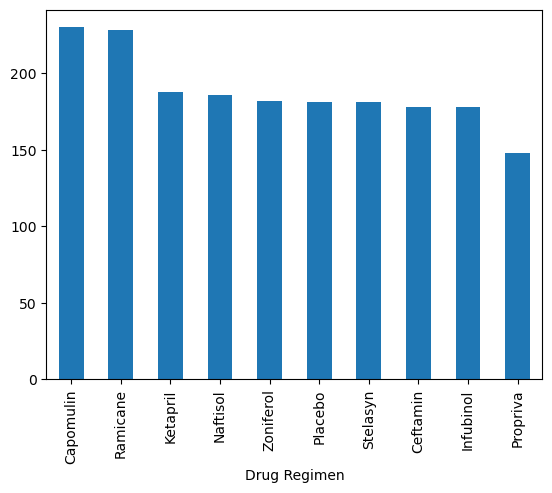

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint = cleaned_df.groupby(["Drug Regimen"])["Timepoint"].count()
timepoint.sort_values(ascending = False).plot.bar()
plt.show()

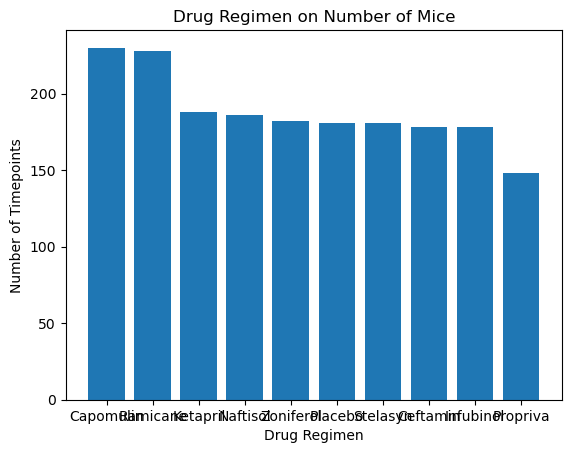

<Figure size 800x400 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint2 = timepoint.sort_values(ascending = False)
plt.bar(timepoint2.index, timepoint2.values)
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.title("Drug Regimen on Number of Mice")
plt.figure(figsize=(8,4))
plt.show()

Sex
Female    922
Male      958
Name: Sex, dtype: int64

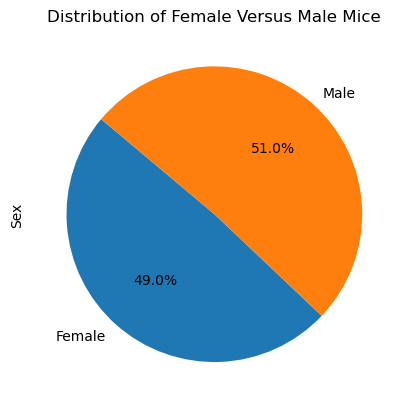

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_male = cleaned_df.groupby(["Sex"])["Sex"].count()
female_male.plot.pie(autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Female Versus Male Mice")
female_male

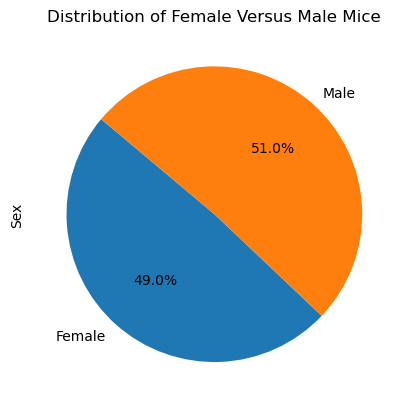

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(female_male, labels=("Female", "Male"), autopct="%1.1f%%", startangle=140)
plt.ylabel("Sex")
plt.title("Distribution of Female Versus Male Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df2 = pd.merge(cleaned_df, last_timepoint_df, on=("Mouse ID", "Timepoint"), how = 'right')
last_timepoint_df2
                            

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,30.638696,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvolume_capomulin = []
tumorvolume_ramicane =[]
tumorvolume_infubinol = []
tumorvolume_ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# add subset 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for  index, row in last_timepoint_df2.iterrows():
    if row ["Drug Regimen"] == "Capomulin":
        tumorvolume_capomulin.append(row["Tumor Volume (mm3)"])
    if row ["Drug Regimen"] == "Ramicane":
        tumorvolume_ramicane.append(row["Tumor Volume (mm3)"])
    if row ["Drug Regimen"] == "Infubinol":
        tumorvolume_infubinol.append(row["Tumor Volume (mm3)"])
    if row ["Drug Regimen"] == "Ceftamin":
        tumorvolume_ceftamin.append(row["Tumor Volume (mm3)"])
    
    
drugs_df = pd.DataFrame ({"Capomulin": tumorvolume_capomulin,
                         treatments[1]: tumorvolume_ramicane,
                         treatments[2]: tumorvolume_infubinol,
                         treatments[3]: tumorvolume_ceftamin})
    
    # Determine outliers using upper and lower bounds
drugs_df_maximum = drugs_df.max()
drugs_df_minimum = drugs_df.min()
drugs_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


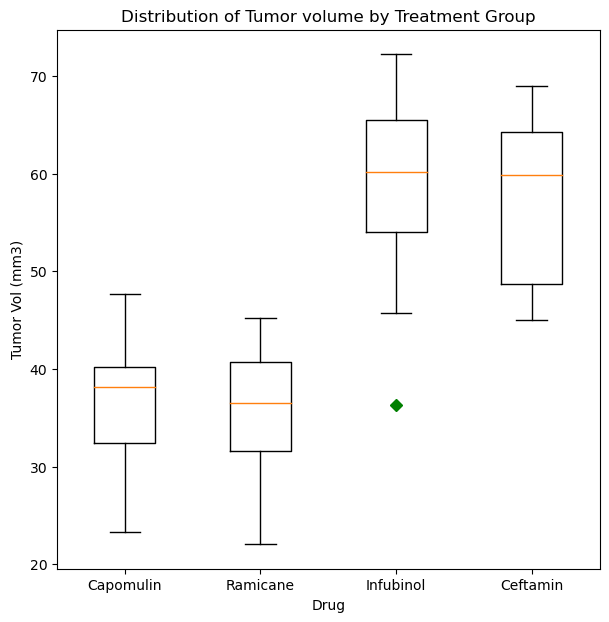

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_dist = [drugs_df[treatments[0]],
               drugs_df[treatments[1]],
                drugs_df[treatments[2]],
                drugs_df[treatments[3]]
               
               ]
fig1, ax = plt.subplots(figsize=(7,7))
ax.set_title('Distribution of Tumor volume by Treatment Group')
ax.set_xlabel('Drug')
ax.set_ylabel('Tumor Vol (mm3)')

ax.boxplot(boxplot_dist, 0, 'gD')
plt.xticks([1,2,3,4], treatments)

plt.show()

## Line and Scatter Plots

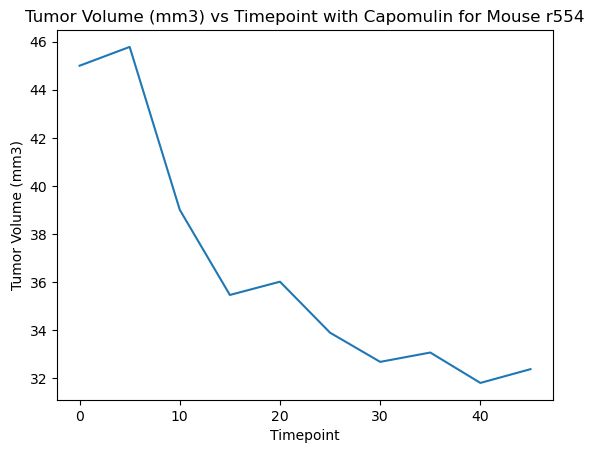

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tumor_timepoint = combined_df[combined_df["Drug Regimen"]=="Capomulin"]
mouse = combined_df.loc[combined_df["Mouse ID"]=="r554"]
timepoints = [0,5,10,15,20,25,30,35,40,45,50,55,60]
plt.title('Tumor Volume (mm3) vs Timepoint with Capomulin for Mouse r554')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])

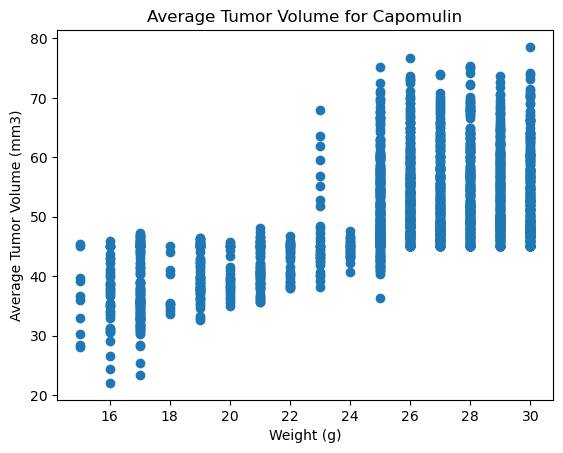

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
entire_cap = combined_df.loc[combined_df["Drug Regimen"]=="Capomulin"]
average_tumor = pd.DataFrame(entire_cap.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values())
end_average_tumor = combined_df[["Weight (g)", "Tumor Volume (mm3)"]]

x = end_average_tumor["Weight (g)"]
y = end_average_tumor["Tumor Volume (mm3)"]

plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume for Capomulin')
plt.show()


## Correlation and Regression

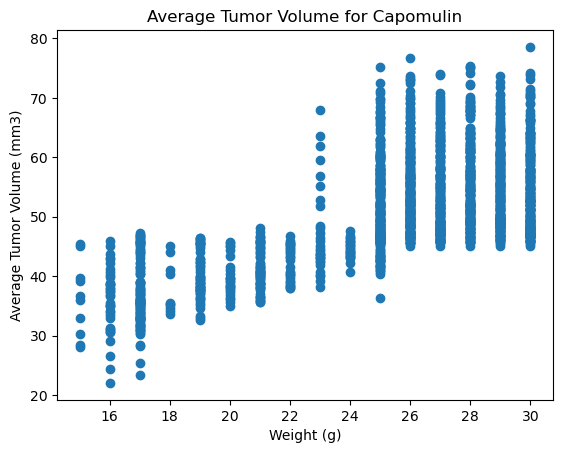

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
entire_cap = combined_df.loc[combined_df["Drug Regimen"]=="Capomulin"]
average_tumor = pd.DataFrame(entire_cap.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values())
end_average_tumor = combined_df[["Weight (g)", "Tumor Volume (mm3)"]].drop_duplicates()

x = end_average_tumor["Weight (g)"]
y = end_average_tumor["Tumor Volume (mm3)"]


slope, intercept, r, p, std_err = st.linregress(x, y)


plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume for Capomulin')
plt.show()


